# Computer Vision and Convolutional Neural Networks #

## Computer Vision Libraries ##

**torchvision** computer vision library
<br>**torchvision.datasets**  : get datasets and data loading functions for computer vision
<br>**torchvision.models** : pre trained computer vision models
<br>**torchvision.transforms** : functionsl for manupulating your vision data
<br>**torch.utils.data.Dataset** : Base datgaset class for PyTorch
<br>**torch.utils.data.DataLoader**: Creates a python iterable over a dataset

In [4]:
# Imports
import torch
from torch import nn

# Torch Vision
import torchvision
from torchvision import datasets
from torchvision import transforms

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.9.0.dev20250722+cu128
0.24.0.dev20250722+cu128


### 1. DATA ###
**We will use MNIST Dataset**

In [5]:
# Setting training data
train_data = datasets.MNIST(
    root="data", # where to download the data
    train=True, # do we want train data. Default is false = testing data
    download=True,
    transform=torchvision.transforms.ToTensor(), # How do we transform the data
    target_transform=None, # How do we want to transform labels/targets
)
test_data = datasets.MNIST(
    root="data",
    train=False, # this will set the test_data to test data 
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.10MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 393kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.14MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 21.4MB/s]


In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# See the first training eample
image,label = train_data[0]
label

5

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
class_to_idx = train_data.class_to_idx

In [10]:
train_data.targets # labels

tensor([5, 0, 4,  ..., 5, 6, 8])

In [11]:
image.shape, label # shape is channels, H, W

(torch.Size([1, 28, 28]), 5)

Text(0.5, 1.0, '5')

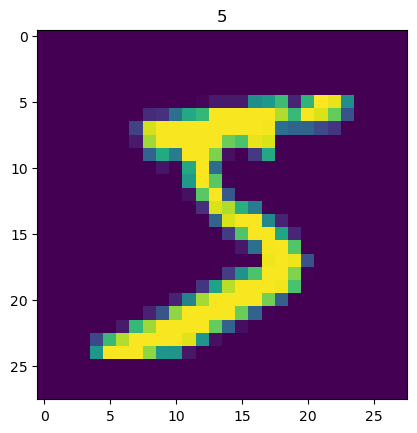

In [12]:
 ### Visualizing our data
#plt.imshow(image) # matplot lib expects the shape H,W,Channels
plt.imshow(image.squeeze())
plt.title(label)

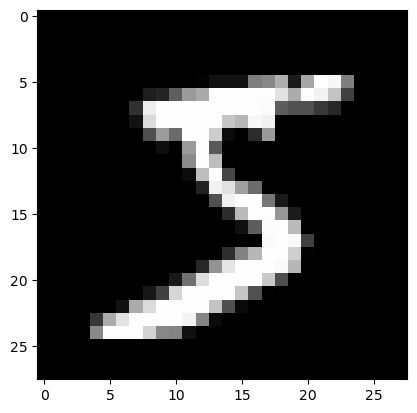

In [13]:
plt.imshow(image.squeeze(), cmap="gray")

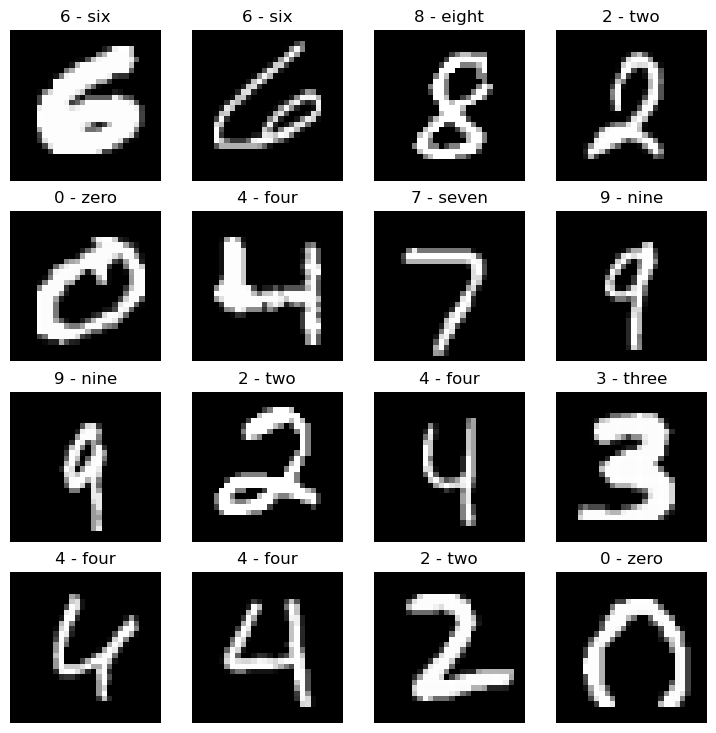

In [14]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.imshow(img.squeeze(), cmap="gray")
    plt.axis(False)

In [15]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [16]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 2. Prepare DataLoader ##
Data loader turns our dataset into a python iterable
<br> More specifically, we want to turn our data into batches or mini batches
<br> As making mini batches is efficient and we cant look at 60k images 
<br> So we make batches of 32 images


In [17]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameters
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # same order of the data is fine
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79d0c60d8c20>,
 <torch.utils.data.dataloader.DataLoader at 0x79d0c36073e0>)

In [18]:
# check out what you nhave created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"lenght of the train data loader,{len(train_dataloader)} batches of  {BATCH_SIZE}...")
print(f"Length of the test data loader: {len(test_dataloader)}  batches of  {BATCH_SIZE}...")
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # next batch size

print("Shape of the batches of train")
train_features_batch.shape, train_labels_batch.shape

print(f"Test data loader : {test_dataloader}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79d0c60d8c20>, <torch.utils.data.dataloader.DataLoader object at 0x79d0c36073e0>)
lenght of the train data loader,1875 batches of  32...
Length of the test data loader: 313  batches of  32...
Shape of the batches of train
Test data loader : <torch.utils.data.dataloader.DataLoader object at 0x79d0c36073e0>


torch.Size([1, 28, 28])
Image Size : torch.Size([1, 28, 28])
Label : 0 - zero, shape  = torch.Size([])


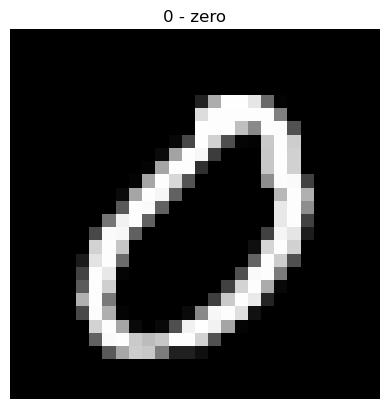

In [19]:
# Visualize
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item() # 
#.item is to take out value as randint returns a tensor. This can be only done if size = 1
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(img.shape)
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size : {img.shape}")
print(f"Label : {class_names[label]}, shape  = {label.shape}")

In [20]:
# Setting up device agnostic code
!nvidia-smi

Sun Feb  8 21:46:25 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.126.09             Driver Version: 580.126.09     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8              3W /   35W |      13MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
torch.cuda.is_available()

True

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"

### Building a CNN Model ###

In [23]:
# Build a CNN

class MNISTModelV2(nn.Module):
    ''' Make a Tiny VGG model for MNIST digit classification '''
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2)
            
        )

        # Second Block
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),       
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            
            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2) # default stride  = kernel size = 
        )

        # Classiifer Layer
        self.classifier = nn.Sequential(
            nn.Flatten(), # Remember Flatter flatens every dimension except for the first. so (32,1,2,3,4) -> (32,24)
            nn.Linear(in_features=hidden_units * 7 * 7,
                     out_features=output_shape)
        )
    def forward(self, x):
        #print(x.shape)
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        return x
    
        
        

In [24]:
torch.manual_seed(0)
image.shape

torch.Size([1, 28, 28])

In [25]:
model_2 = MNISTModelV2(input_shape=1, # number of channels
                       hidden_units=10, # depth of each block in intermediate layers
                       output_shape=len(class_names)
                      ).to(device)

torch.Size([1, 28, 28]) torch.Size([1, 24, 24]) torch.Size([1, 22, 22])


(-0.5, 21.5, 21.5, -0.5)

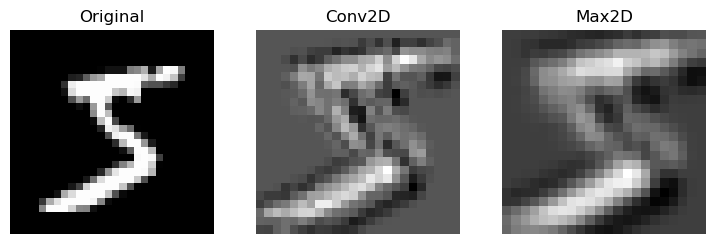

In [26]:

# Visualizing standalon conv and max pool opperations

test_conv_layer = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5, padding=0, stride=1)
test_max_pool = nn.AvgPool2d(kernel_size=3, stride=1, padding=0)
with torch.inference_mode():
    conv_out = test_conv_layer(image)
    max_out = test_max_pool(conv_out)
print(image.shape, conv_out.shape, max_out.shape)
fig = plt.figure(figsize = (9,9))
fig.add_subplot(3, 3, 1)
plt.title("Original")
plt.imshow(image.squeeze(), cmap="gray")
plt.axis(False)
fig.add_subplot(3,3, 2)
plt.title("Conv2D")
plt.imshow(conv_out.squeeze(), cmap="gray")
plt.axis(False)
fig.add_subplot(3,3, 3)
plt.title("Max2D")
plt.imshow(max_out.squeeze(), cmap="gray")
plt.axis(False)

In [27]:
model_2(image.unsqueeze(0).to(device)) # this takes a batch

tensor([[ 0.0801, -0.0825, -0.0126, -0.0048, -0.0437, -0.0362,  0.0329,  0.0011,
         -0.0104,  0.0276]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Setting Up Loss Function and Optimizer ###

In [28]:
from helper_functions import *

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1)

#### Create a Function for Training and testing step

In [30]:
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               optimizer: torch.optim.Optimizer, 
               loss_fn: nn.Module,
               accuracy_fn, 
               device: torch.device):
    train_loss, train_acc = 0, 0
    model.train()
    
    # iterate over every batch
    for batch, (X, y) in enumerate(data_loader):
        # move data to device
        X, y = X.to(device), y.to(device)
        
        # 1 Forward Pass
        y_pred = model(X)

        # loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        # zero grad the optimizer
        optimizer.zero_grad()

        # Backprop
        loss.backward()

        # update the Gradient
        optimizer.step()

    train_loss /= len(data_loader) # average loss
    train_acc /= len(data_loader) # average accuracy
    return train_loss, train_acc

        
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    test_loss, test_acc = 0, 0
    # put into the eval mode
    model.eval()
    # Context manager for inference mode
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2 Calculate loss
            test_loss += loss_fn(test_pred, y).item()
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
    return test_loss, test_acc

#### Setup training Loop ####

In [31]:
## torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Lists to store metrics for plotting
train_losses = []
test_losses = []
train_accs = []
test_accs = []

train_time_start = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch+1}/{epochs} \n ------")
    
    # Training step
    train_loss, train_acc = train_step(model=model_2,
                                        data_loader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        accuracy_fn=accuracy_fn,
                                        device=device)
    
    # Test step
    test_loss, test_acc = test_step(model=model_2,
                                     data_loader=test_dataloader,
                                     loss_fn=loss_fn,
                                     accuracy_fn=accuracy_fn,
                                     device=device)
    
    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")
    print(f"Test loss:  {test_loss:.4f} | Test acc:  {test_acc:.2f}%\n")

train_time_end = timer()
total_time = print_train_time(start=train_time_start, end=train_time_end, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 1/5 
 ------
Train loss: 0.2803 | Train acc: 90.74%
Test loss:  0.0714 | Test acc:  97.60%

Epoch : 2/5 
 ------
Train loss: 0.0743 | Train acc: 97.72%
Test loss:  0.0528 | Test acc:  98.20%

Epoch : 3/5 
 ------
Train loss: 0.0588 | Train acc: 98.17%
Test loss:  0.0501 | Test acc:  98.35%

Epoch : 4/5 
 ------
Train loss: 0.0498 | Train acc: 98.44%
Test loss:  0.0376 | Test acc:  98.84%

Epoch : 5/5 
 ------
Train loss: 0.0440 | Train acc: 98.56%
Test loss:  0.0345 | Test acc:  98.82%


Train time on cuda: 21.471 seconds


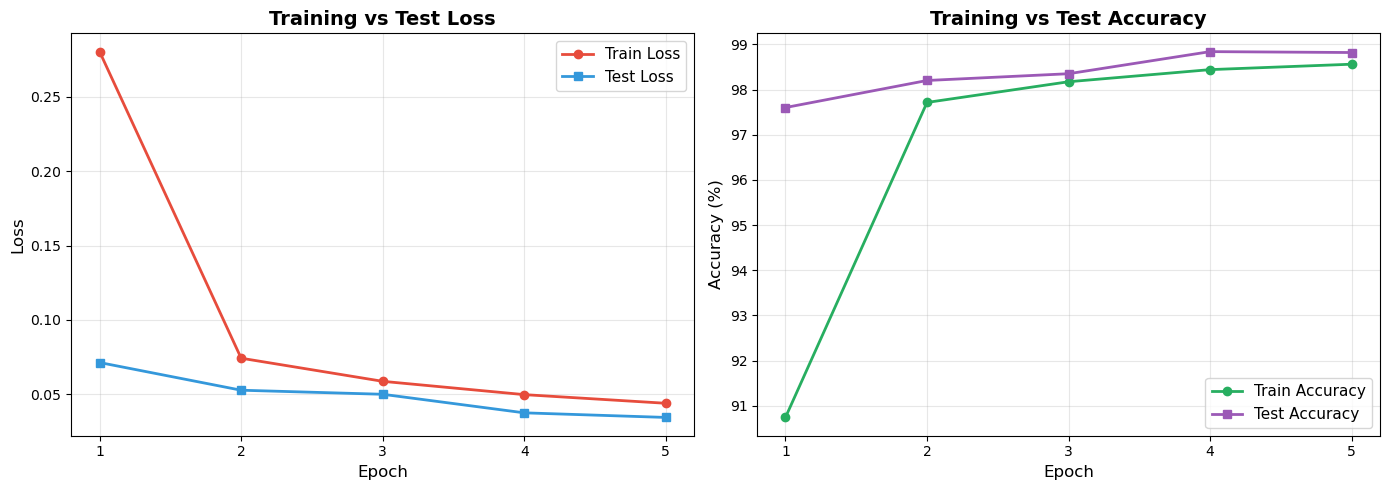


Final Results after 5 epochs:
  Train Loss: 0.0440 | Train Acc: 98.56%
  Test Loss:  0.0345 | Test Acc:  98.82%


In [32]:
# Plot Training and Test Loss/Accuracy Curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axes[0].plot(range(1, epochs + 1), train_losses, label='Train Loss', marker='o', color='#E74C3C', linewidth=2)
axes[0].plot(range(1, epochs + 1), test_losses, label='Test Loss', marker='s', color='#3498DB', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training vs Test Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, epochs + 1))

# Plot Accuracy
axes[1].plot(range(1, epochs + 1), train_accs, label='Train Accuracy', marker='o', color='#27AE60', linewidth=2)
axes[1].plot(range(1, epochs + 1), test_accs, label='Test Accuracy', marker='s', color='#9B59B6', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training vs Test Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, epochs + 1))

plt.tight_layout()
plt.show()

# Print final results
print(f"\nFinal Results after {epochs} epochs:")
print(f"  Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accs[-1]:.2f}%")
print(f"  Test Loss:  {test_losses[-1]:.4f} | Test Acc:  {test_accs[-1]:.2f}%")


In [33]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [34]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV2',
 'model_loss': 0.034501347690820694,
 'model_acc': 98.82188498402556}

#### make and evaluate random predictions with the model

In [35]:
def make_predictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim = 0).to(device) # add a batch dimension model  and put on device
            # forward pass. get raw logits
            pred_logit = model(sample)
            
            # get prediction probabilities
            pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())
    # Stack the pred probs to turn list to tensor
    return torch.stack(pred_probs)


In [36]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9): # randomly sample 9 samples
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

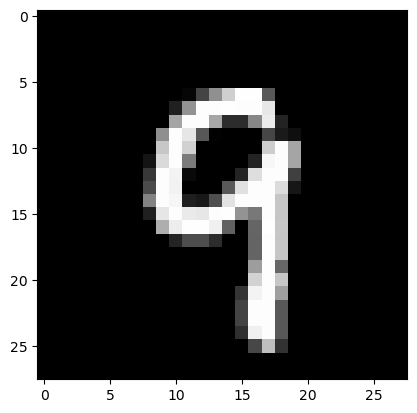

In [37]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")

In [38]:
# make predictions
pred_probs = make_predictions(model=model_2, data=test_samples)

# view first two pred probs

print(pred_probs[:2])

tensor([[7.9284e-13, 7.1993e-13, 4.4701e-08, 2.6854e-09, 3.0106e-06, 2.9315e-09,
         3.0679e-13, 5.1047e-08, 7.0849e-08, 1.0000e+00],
        [2.7871e-12, 1.3067e-05, 9.9997e-01, 2.1182e-05, 2.0366e-11, 1.1515e-14,
         1.1305e-12, 4.0745e-08, 6.3380e-07, 3.9068e-12]])


In [39]:
pred_class = pred_probs.argmax(dim=1)
pred_class

tensor([9, 2, 0, 2, 3, 0, 8, 2, 9])

In [40]:
test_labels

[9, 2, 0, 2, 3, 0, 8, 2, 9]

### making a confusion matrix ###

In [41]:
import torchmetrics
import mlxtend

In [42]:
!pip install tqdm

In [43]:
from tqdm.auto import tqdm
# Make preditions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "making predictions ...."):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim=1)

        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

making predictions ....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1, 0, 8, 1, 8, 8, 8, 8])

In [44]:
print(mlxtend.__version__)

0.23.4


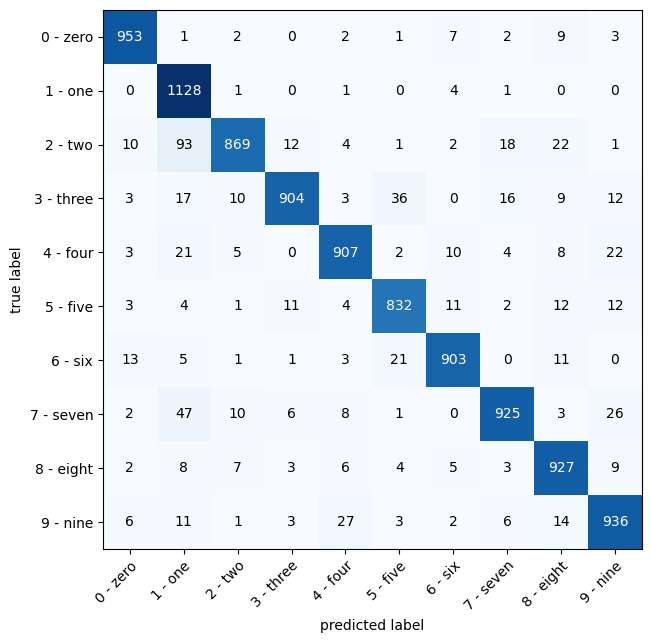

In [45]:
# Making a confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = 'multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               class_names=class_names,
                               figsize=(10,7)) # matplot lib supports numpy


In [46]:
confmat_tensor

tensor([[ 953,    1,    2,    0,    2,    1,    7,    2,    9,    3],
        [   0, 1128,    1,    0,    1,    0,    4,    1,    0,    0],
        [  10,   93,  869,   12,    4,    1,    2,   18,   22,    1],
        [   3,   17,   10,  904,    3,   36,    0,   16,    9,   12],
        [   3,   21,    5,    0,  907,    2,   10,    4,    8,   22],
        [   3,    4,    1,   11,    4,  832,   11,    2,   12,   12],
        [  13,    5,    1,    1,    3,   21,  903,    0,   11,    0],
        [   2,   47,   10,    6,    8,    1,    0,  925,    3,   26],
        [   2,    8,    7,    3,    6,    4,    5,    3,  927,    9],
        [   6,   11,    1,    3,   27,    3,    2,    6,   14,  936]])

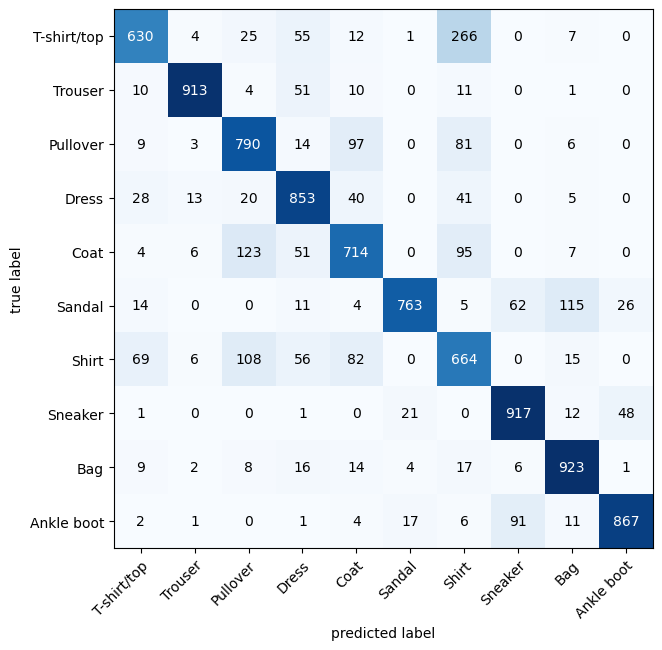

In [68]:
# Making a confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
# Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = 'multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                               class_names=class_names,
                               figsize=(10,7)) # matplot lib supports numpy